Datos simulados guardados en ejemplo_hipotesis.csv

Tabla de contingencia entre Grupo de Edad y Tipo de Dieta:
Tipo_Dieta  Alta en grasas  Balanceada  Vegetariana
Grupo_Edad                                         
Adulto                  20          27            7
Joven                   10          34            7
Mayor                   12          27            6


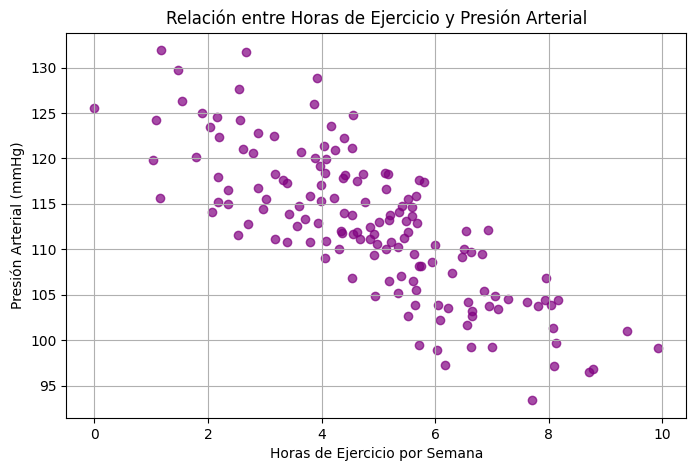


Coeficiente de correlación de Pearson: -0.79
P-valor: 0.0000
Interpretación: Existe una correlación moderada negativa entre las horas de ejercicio y la presión arterial.
La correlación es estadísticamente significativa (p < 0.05).


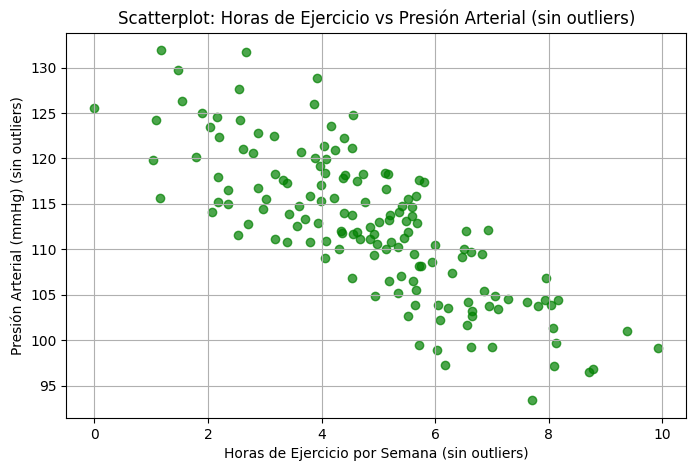

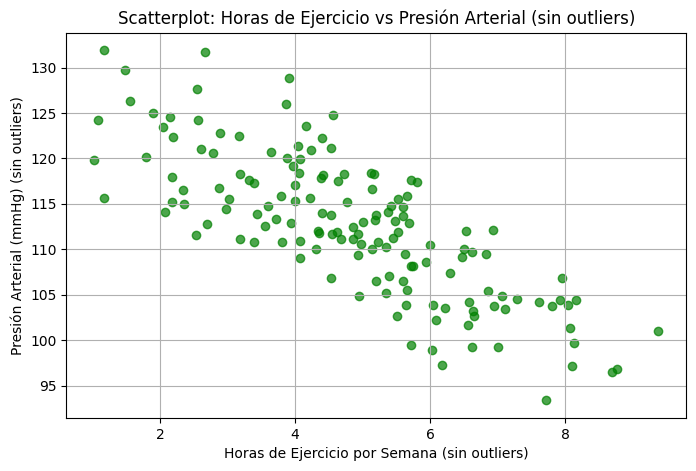


Coeficiente de Pearson después de filtrar outliers:
Coeficiente: -0.78
P-valor: 0.0000

# Reflexión: Correlación no implica causalidad.
Aunque observamos que a mayor cantidad de ejercicio tiende a disminuir la presión arterial (correlación negativa), esto no significa necesariamente que el ejercicio sea la única causa de la baja presión. Pueden existir otros factores (alimentación, genética, estrés, etc.) que influyan en la presión arterial. Por ejemplo, personas con dietas saludables pueden hacer más ejercicio y también tener menor presión arterial, pero la dieta sería un factor de confusión. Siempre es necesario analizar el contexto y no asumir causalidad solo por correlación.


In [ ]:
#Correlación, Tablas de Contingencia y Visualización
#
# Este script resuelve los requerimientos de la actividad:
# 1. Creación de datos simulados numéricos relacionados
# 2. Construcción de tabla de contingencia con variables categóricas
# 3. Visualización con scatterplot
# 4. Cálculo del coeficiente de correlación de Pearson
# 5. Reflexión sobre correlación vs. causalidad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# --- 1. Creación de Datos Simulados (2 puntos) ---
np.random.seed(42)
n = 150  # Número de registros

# Simulamos horas de ejercicio por semana (entre 0 y 10)
horas_ejercicio = np.random.normal(5, 2, n)
horas_ejercicio = np.clip(horas_ejercicio, 0, 10)

# Simulamos presión arterial (más ejercicio, menor presión en promedio)
presion_arterial = 130 - horas_ejercicio * np.random.uniform(2, 4) + np.random.normal(0, 5, n)

# Variables categóricas
# Grupo de edad: Joven (18-35), Adulto (36-55), Mayor (56+)
grupo_edad = np.random.choice(['Joven', 'Adulto', 'Mayor'], size=n, p=[0.4, 0.4, 0.2])
# Tipo de dieta: Balanceada, Alta en grasas, Vegetariana

tipo_dieta = np.random.choice(['Balanceada', 'Alta en grasas', 'Vegetariana'], size=n, p=[0.5, 0.3, 0.2])

# Creamos el DataFrame
df = pd.DataFrame({
    'Horas_Ejercicio': horas_ejercicio,
    'Presion_Arterial': presion_arterial,
    'Grupo_Edad': grupo_edad,
    'Tipo_Dieta': tipo_dieta
})

# Guardamos el DataFrame a CSV
csv_path = 'ejemplo_hipotesis.csv'
df.to_csv(csv_path, index=False)
print(f"Datos simulados guardados en {csv_path}\n")

# --- 2. Construcción de una Tabla de Contingencia ---
# Relación entre grupo de edad y tipo de dieta
print("Tabla de contingencia entre Grupo de Edad y Tipo de Dieta:")
tabla = pd.crosstab(df['Grupo_Edad'], df['Tipo_Dieta'])
print(tabla)

# --- 3. Visualización con Scatterplot---
# Relación entre horas de ejercicio y presión arterial
plt.figure(figsize=(8,5))
plt.scatter(df['Horas_Ejercicio'], df['Presion_Arterial'], alpha=0.7, color='purple')
plt.xlabel('Horas de Ejercicio por Semana')
plt.ylabel('Presión Arterial (mmHg)')
plt.title('Relación entre Horas de Ejercicio y Presión Arterial')
plt.grid(True)
plt.show()

# --- 4. Cálculo del Coeficiente de Correlación de Pearson---
coef, p_valor = stats.pearsonr(df['Horas_Ejercicio'], df['Presion_Arterial'])
print(f"\nCoeficiente de correlación de Pearson: {coef:.2f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretación
if coef < 0:
    sentido = 'negativa'
else:
    sentido = 'positiva'
if abs(coef) >= 0.8:
    interpretacion = 'correlación fuerte'
elif abs(coef) >= 0.5:
    interpretacion = 'correlación moderada'
elif abs(coef) >= 0.2:
    interpretacion = 'correlación débil'
else:
    interpretacion = 'correlación despreciable o nula'
print(f"Interpretación: Existe una {interpretacion} {sentido} entre las horas de ejercicio y la presión arterial.")
if p_valor < 0.05:
    print("La correlación es estadísticamente significativa (p < 0.05).")
else:
    print("La correlación NO es estadísticamente significativa (p >= 0.05).")

# --- Gráfica scatterplot después de filtrar outliers ---
plt.figure(figsize=(8,5))
plt.scatter(df['Horas_Ejercicio'], df['Presion_Arterial'], alpha=0.7, color='green')
plt.xlabel('Horas de Ejercicio por Semana (sin outliers)')
plt.ylabel('Presión Arterial (mmHg) (sin outliers)')
plt.title('Scatterplot: Horas de Ejercicio vs Presión Arterial (sin outliers)')
plt.grid(True)
plt.show()

    
# --- 4b. Identificación y filtrado de outliers antes del cálculo de Pearson ---
# Los outliers pueden distorsionar la correlación. Usamos el método del rango intercuartílico (IQR) para filtrar outliers en ambas variables.

def filtrar_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return series[(series >= limite_inferior) & (series <= limite_superior)]

# Filtramos outliers en ambas variables
horas_filtradas = filtrar_outliers(df['Horas_Ejercicio'])
presion_filtrada = filtrar_outliers(df.loc[horas_filtradas.index, 'Presion_Arterial'])

# --- Gráfica scatterplot después de filtrar outliers ---
plt.figure(figsize=(8,5))
plt.scatter(horas_filtradas, presion_filtrada, alpha=0.7, color='green')
plt.xlabel('Horas de Ejercicio por Semana (sin outliers)')
plt.ylabel('Presión Arterial (mmHg) (sin outliers)')
plt.title('Scatterplot: Horas de Ejercicio vs Presión Arterial (sin outliers)')
plt.grid(True)
plt.show()


# Calculamos la correlación de Pearson sin outliers
coef_filtrado, p_filtrado = stats.pearsonr(horas_filtradas, presion_filtrada)
print("\nCoeficiente de Pearson después de filtrar outliers:")
print(f"Coeficiente: {coef_filtrado:.2f}")
print(f"P-valor: {p_filtrado:.4f}")    

# --- 5. Reflexión sobre Correlación vs. Causalidad---
print("\n# Reflexión: Correlación no implica causalidad.\n" \
      "Aunque observamos que a mayor cantidad de ejercicio tiende a disminuir la presión arterial (correlación negativa), "
      "esto no significa necesariamente que el ejercicio sea la única causa de la baja presión. "
      "Pueden existir otros factores (alimentación, genética, estrés, etc.) que influyan en la presión arterial. "
      "Por ejemplo, personas con dietas saludables pueden hacer más ejercicio y también tener menor presión arterial, "
      "pero la dieta sería un factor de confusión. Siempre es necesario analizar el contexto y no asumir causalidad solo por correlación.")
